# Multi harmonic response:
    Compute max harmonic reponse at a given set of engine orders
    1-Instanciate the operator allowing to read results (here displacements)
    2-Select the direction/component of the previous result
    3-define the rpm scoping (set of engine orders)
    4-compute the multi-harmonic max response

In [1]:
from ansys.dpf import core as dpf

In [26]:
path = r'c:\temp\file_harmonic.rst'
model = dpf.Model(path)
metadata = model.metadata

In [27]:
tf = model.metadata.time_freq_support
print(model.metadata.time_freq_support)

Time/Frequency Info:
	Number of sets: 1000

With complex values
 
 Cumulative   Frequency (Hz)    Loadstep     Substep       RPM     
     1             1.0             1            1         1e+02    
     2             2.0             1            2         1e+02    
     3             3.0             1            3         1e+02    
     4             4.0             1            4         1e+02    
     5             5.0             1            5         1e+02    
     6             6.0             1            6         1e+02    
     7             7.0             1            7         1e+02    
     8             8.0             1            8         1e+02    
     9             9.0             1            9         1e+02    
     10            10.0            1            10        1e+02    
     11            11.0            1            11        1e+02    
     12            12.0            1            12        1e+02    
     13            13.0            1            13

- Load dpf.math plugin, allows to load inverse FFT and multi harmonic min max operators 

In [28]:
base = dpf.BaseService()
base.load_library("Ans.Dpf.Math.dll","math")

In [29]:
timeIds = list(range(1,metadata.time_freq_support.n_sets+1))

rpms = dpf.Scoping()
rpms.ids = [1,2,3]

nodes = dpf.Scoping()
nodes.ids = [2,18]

In [30]:
dispOp = model.operator("UTOT")
comp = dpf.Operator("component_selector_fc")
fft = dpf.Operator("fft_multi_harmonic_minmax")

#### Read the nodal solution (x,y,z,Rx,Ry,Rz) at the defined scoped nodes (nodes) and defined scoped time stes (timeIds)

In [31]:
dispOp.inputs.mesh_scoping.connect(nodes)
dispOp.inputs.time_scoping.connect(timeIds)

#### extract Rz component and compute a multi-harmonic response on the defined rpms

In [44]:
comp.inputs.connect(dispOp.outputs)
comp.inputs.component_number.connect(5)

fft.inputs.connect(comp.outputs)
fft.inputs.rpm_scoping.connect(rpms)

In [45]:
fields = comp.outputs.fields_container()
field = fields[0]

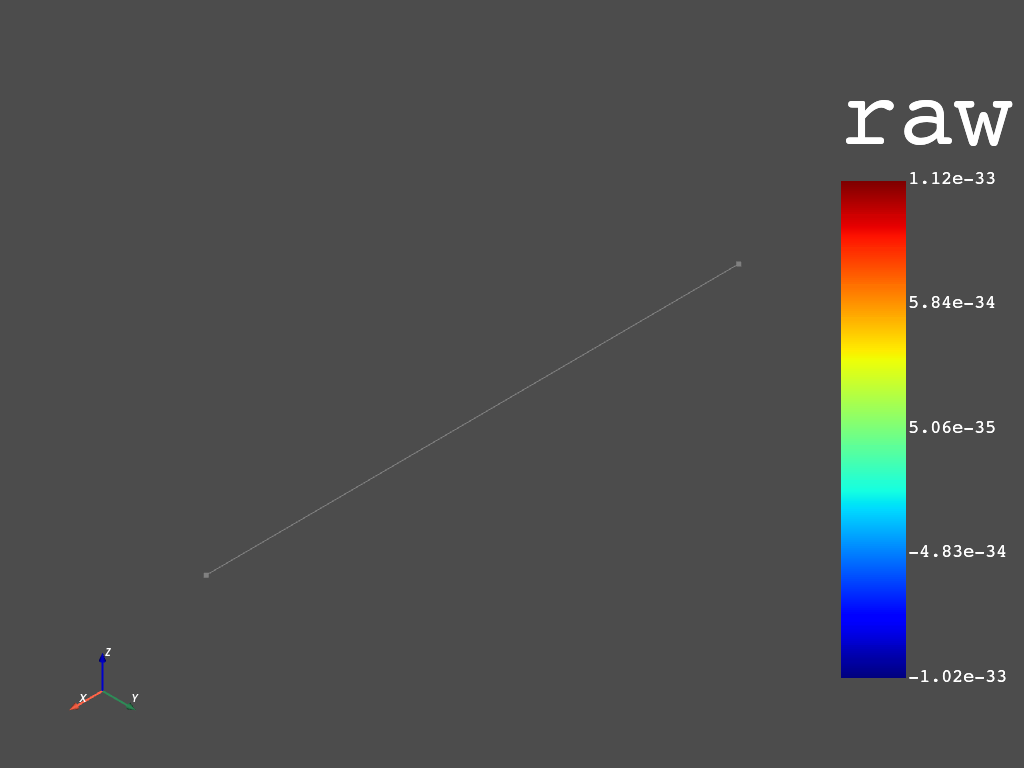

[(3.555875221025277, 2.455875221025277, 2.5013297664802767),
 (1.1, -5.3026267449999995e-18, 0.045454545455),
 (0.0, 0.0, 1.0)]

In [46]:
metadata.meshed_region.plot(field)

In [47]:
fields = fft.outputs.field_max()
len(fields)

2

In [48]:
field1 = fields[0]
field2 = fields[1]

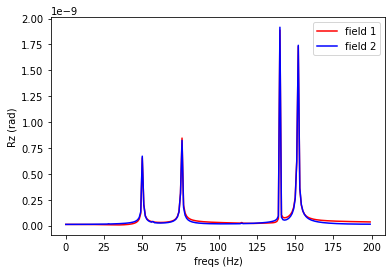

In [49]:
import matplotlib.pyplot as pyplot

pyplot.plot(field1.data,'r',label='field 1')
pyplot.plot(field2.data,'b',label="field 2")
#pyplot.title("maximum and minimum of displacement over time")
pyplot.xlabel("freqs (Hz)")
pyplot.ylabel("Rz (rad)")
leg = pyplot.legend()

In [42]:
import scipy as sc

ModuleNotFoundError: No module named 'scipy'

In [85]:
data = sc.ifft(field1.data)

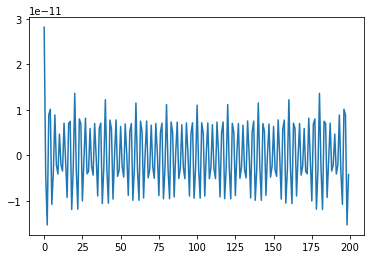

In [86]:
pyplot.plot(data)

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

from ansys.dpf import core as dpf
from ansys.dpf.core import examples



harmonic = examples.download_multi_harmonic_result()

In [7]:
transient


'C:\\Users\\rlagha\\AppData\\Local\\ansys-dpf-core\\ansys-dpf-core\\examples\\transient\\transient.rst'

In [2]:
import numpy as np
import matplotlib.pyplot as pyplot

from ansys.dpf import core as dpf
from ansys.dpf.core import examples

###############################################################################
# Begin by downloading the example harmonic result.  This result is
# not included in the core module by default to speed up the install.
# Download should only take a few seconds.
#
# Next, create the model and display the state of the result.  Note
# that this harmonic result file contains several rpms,
# each rpm has several frequencies.

harmonic = examples.download_multi_harmonic_result()
model = dpf.Model(harmonic)
#print(model)


###############################################################################
# Read the analysis domain support 
tf = model.metadata.time_freq_support
#print(model.metadata.time_freq_support)

###############################################################################
# Load the dpf.math plugin to have access to fft operators
base = dpf.BaseService()
base.load_library("Ans.Dpf.Math.dll","math")

###############################################################################
# Obtain Minimum and Maximum Displacement for all Results
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a total displacement operator and set its time scoping request to
# the entire time freq support and its nodes scoping into user defined nodes.
dispOp = model.operator("UTOT")
timeIds = list(range(1,metadata.time_freq_support.n_sets+1))

#define nodal scoping
nodes = dpf.Scoping()
nodes.ids = [2,18]

#connect the frequencies and the nodes scopings to the result provider operator
dispOp.inputs.mesh_scoping.connect(nodes)
dispOp.inputs.time_scoping.connect(timeIds)

# extract Rz component using the component selector operator
comp = dpf.Operator("component_selector_fc")
comp.inputs.connect(dispOp.outputs)
comp.inputs.component_number.connect(5)

#compute the multi-harmonic response based on Rz and a set of rpms
rpms = dpf.Scoping()
rpms.ids = [1,2,3]

fft = dpf.Operator("fft_multi_harmonic_minmax")

fft.inputs.connect(comp.outputs)
fft.inputs.rpm_scoping.connect(rpms)


fields = fft.outputs.field_max()
len(fields) #we will have a multi-harmonic response per node, here 2 fields

field1 = fields[0]
field2 = fields[1]

###############################################################################
# Plot the minimum and maximum displacements over time

pyplot.plot(field1.data,'r',label='field 1')
pyplot.plot(field2.data,'b',label="field 2")
pyplot.xlabel("freqs (Hz)")
pyplot.ylabel("displacement (m)")
pyplot.legend()
pyplot.show()

NameError: name 'metadata' is not defined

In [2]:
dpf.__file__


'e:\\ansysdev\\pyansys\\dpf-core\\ansys\\dpf\\core\\__init__.py'

In [12]:
doc.inputs.output_path.connect(r'C:\temp\dpf.html')

In [13]:
doc.run()